In [90]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
from ast import literal_eval
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../input/books_1.Best_Books_Ever.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [34]:
pd.set_option('display.max_columns', 25)

In [35]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [36]:
# Checking if there are duplicate rows

df.duplicated().value_counts()

False    52428
True        50
dtype: int64

In [37]:
# Droping duplicate rows

df = df.drop_duplicates()

In [38]:
# Checking the dataframe after removing the duplicates

df.duplicated().value_counts()

False    52428
dtype: int64

In [39]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

## Changing data formats

From initial inspection, we can see that data types of some colums do not match the values they store. Before going forward changing them to correct data types is a good idea. 

In [40]:
# While trying to change a data type of 'pages' column, an error pointed out a value that cannot be converted.
# Finding the number or outlier value.

pages = df.groupby('pages')['title'].count()
pages.head()

pages
0         164
1 page     23
10         18
100        69
1000        4
Name: title, dtype: int64

In [41]:
df[df.loc[:, 'pages'] == '1 page']

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
3743,71778.The_Mitford_Years_Boxed_Set_Volumes_1_6,The Mitford Years Boxed Set Volumes 1-6,Mitford Years #1-6,Jan Karon,4.36,The first six novels in the bestselling Mitfor...,English,9780147717795,"['Fiction', 'Christian Fiction', 'Humor', 'Con...",[],Boxed Set,NaN,1 page,Penguin Books,September 24th 2002,NaN,[],1266,"['669', '408', '166', '17', '6']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,853,19,28.09
5912,588704.Saga_of_Darren_Shan_Box_Set,Saga of Darren Shan Box Set,Cirque du Freak #1-6,Darren Shan (Goodreads Author),4.55,NaN,English,9780007260485,"['Fantasy', 'Fiction', 'Horror', 'Childrens', ...",[],Paperback,NaN,1 page,Harper Collin's,October 1st 2007,NaN,[],2204,"['1452', '544', '182', '14', '12']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,476,5,11.38
19107,18302739-songs-from-the-phenomenal-nothing,Songs from the Phenomenal Nothing,NaN,Steven Luna (Goodreads Author),4.25,"A coming of age novel that doesn't hold back, ...",NaN,9780996512121,"['Young Adult', 'Contemporary', 'Fiction', 'Dr...",[],NaN,NaN,1 page,Booktrope Editions,September 3rd 2013,08/31/13,[],100,"['49', '33', '12', '6', '0']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,3.49
22394,9681425-jim-butcher-box-set,Jim Butcher Box Set,The Dresden Files Omnibus #1,Jim Butcher (Goodreads Author),4.48,Book by,English,9780451949615,"['Fantasy', 'Urban Fantasy', 'Fiction', 'Myste...",['Harry Dresden'],Mass Market Paperback,NaN,1 page,Roc,December 22nd 2010,01/01/01,[],2368,"['1475', '626', '218', '33', '16']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,99,1,46.70
24505,8662494-jim-butcher-box-set-2,Jim Butcher Box Set #2,The Dresden Files #4-6,Jim Butcher (Goodreads Author),4.73,From #1 New York Times bestselling author Jim ...,English,9780451949097,"['Fantasy', 'Urban Fantasy', 'Fiction', 'Vampi...",[],Mass Market Paperback,NaN,1 page,Roc,October 5th 2010,NaN,[],813,"['648', '129', '26', '3', '7']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,98,1,25.51
26766,23500254-the-power-of-vulnerability,The Power of Vulnerability: Teachings of Authe...,NaN,Brené Brown (Goodreads Author),4.64,Show Up and Let Yourself be Seen Is vulnerabil...,English,B00D1Z9RFU,"['Nonfiction', 'Self Help', 'Psychology', 'Aud...",[],Audible Audio,NaN,1 page,Sounds True,May 24th 2013,04/11/13,[],15437,"['11160', '3285', '753', '161', '78']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,97,1,NaN
33235,6408236-der-rote-kreis,"Der rote kreis (Sherlock Holmes, 32)",NaN,Arthur Conan Doyle,3.68,The classic Sherlock Holmes story from Arthur ...,German,B001P7JZOO,"['Mystery', 'Classics', 'Short Stories', 'Fict...","['Sherlock Holmes', 'Dr. John Watson']",Audio CD,NaN,1 page,Maritim (Delta Music),February 28th 2009,11/06/11,[],992,"['213', '345', '347', '75', '12']",91.0,[],https://i.gr-assets.com/images/S/compressed.ph...,92,1,NaN
34437,13488875-the-better-angels-of-our-nature,The Better Angels of Our Nature: Why Violence ...,NaN,"Steven Pinker (Goodreads Author), Arthur Morey...",4.15,We’ve all had the experience of reading about ...,English,9780143122012,"['Nonfiction', 'History', 'Psychology', 'Scien...",[],Audiobook,NaN,1 page,Brilliance Audio,October 4th 2011,10/04/10,['Royal Society Science Book Prize Nominee for...,23911,"['11224', '7670', '3213', '1057', '747']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,91,1,10.11
35233,12889416-a-pleasure-to-burn,A Pleasure to Burn: Fahrenheit 451 Stories,NaN,Ray Bradbury,3.95,Ray Bradbury's novel Fahrenheit 451 is an endu...,English,9781455125043,"['Science Fiction', 'Short Stories', 'Fiction'...",[],Audio CD,NaN,1 page,Blackstone Audiobooks,February 1st 2012,03/31/10,[],1077,"['309', '470', '238', '52', '8']",94.0,[],https:/

In [42]:
# Replacing values to NaN where 'pages' == '1 page'

df = df.replace({'1 page': None})

In [43]:
# Inspecting the change

pages = df.groupby('pages')['title'].count()
pages.head()

pages
0       164
10       18
100      69
1000      4
1001      2
Name: title, dtype: int64

# Checking columns

Dataframe has columns with **NaN** values and **empty lists**. 

Below I attempt to make a picture of values that are outliers compared to the rest of values in their respective columns.

No values will be changed as that would change the end result of data.

In [44]:
# Checking columns where there are values in more than one data type

two_dtypes = []

for row in df:
    col_name = row
    val_count = df[row].apply(type).value_counts()
    if len(val_count) > 1:
        two_dtypes.append(col_name)
        print('Column:', col_name, '\n', 
              'Value count:', '\n', val_count, '\n')

Column: series 
 Value count: 
 <class 'float'>    28983
<class 'str'>      23445
Name: series, dtype: int64 

Column: description 
 Value count: 
 <class 'str'>      51092
<class 'float'>     1336
Name: description, dtype: int64 

Column: language 
 Value count: 
 <class 'str'>      48627
<class 'float'>     3801
Name: language, dtype: int64 

Column: bookFormat 
 Value count: 
 <class 'str'>      50955
<class 'float'>     1473
Name: bookFormat, dtype: int64 

Column: edition 
 Value count: 
 <class 'float'>    47479
<class 'str'>       4949
Name: edition, dtype: int64 

Column: pages 
 Value count: 
 <class 'str'>         50062
<class 'float'>        2343
<class 'NoneType'>       23
Name: pages, dtype: int64 

Column: publisher 
 Value count: 
 <class 'str'>      48736
<class 'float'>     3692
Name: publisher, dtype: int64 

Column: publishDate 
 Value count: 
 <class 'str'>      51549
<class 'float'>      879
Name: publishDate, dtype: int64 

Column: firstPublishDate 
 Value count: 

In [45]:
print(two_dtypes)

['series', 'description', 'language', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'coverImg', 'price']


## Checking columns with empty lists

Some column values are set as **empty lists**.

First, I attempt to find which values in which columns are empty lists. When exploding lists of strings, empty lists will not cause any problems.

This might not negatively impact future analysis on a dataset, but if it does, NaN values can be ignored later on if needed.

In [46]:
# Some columns have values as empty lists.
# Returning the row indice with empty list, limiting output.
# Counting how many values per column there are as an empty list.
# Creating a list where columns have str-list values.

col_lists = []

for row in df:
    col_name = row
    empty_list = df[df.astype(str)[row] == '[]'].index
    if len(empty_list) != 0:
        col_lists.append(col_name)
        print('Column:', col_name, '\n', 
              'Empty list indices:', '\n', empty_list[:10], '\n',
             'Empty list count:', len(empty_list.value_counts()), '\n')

Column: genres 
 Empty list indices: 
 Int64Index([1483, 1567, 2040, 2182, 2272, 2368, 2488, 2512, 2526, 2696], dtype='int64') 
 Empty list count: 4620 

Column: characters 
 Empty list indices: 
 Int64Index([12, 97, 116, 121, 143, 148, 163, 185, 195, 220], dtype='int64') 
 Empty list count: 38668 

Column: awards 
 Empty list indices: 
 Int64Index([3, 7, 8, 11, 12, 13, 15, 16, 17, 18], dtype='int64') 
 Empty list count: 41823 

Column: ratingsByStars 
 Empty list indices: 
 Int64Index([4968, 5003, 5716, 8317, 8321, 11131, 11249, 11313, 11326, 11412], dtype='int64') 
 Empty list count: 1422 

Column: setting 
 Empty list indices: 
 Int64Index([11, 12, 20, 22, 29, 33, 41, 45, 50, 51], dtype='int64') 
 Empty list count: 40858 



In [47]:
# Columns that contain values in a list

print(col_lists)

['genres', 'characters', 'awards', 'ratingsByStars', 'setting']


## Checking columns with NaN values.

The dataset has a lot of **NaN** and **Null (empty)** values. Before going forward, it is important to deal with NaN values as they migth have a negative impact in future analysis of the dataset.

NaN stands for **Not A Number** and is one of the common ways to represent the missing value in the data. It is a special **[floating-point](https://pandas.pydata.org/docs/user_guide/missing_data.html#integer-dtypes-and-missing-data)** value and cannot be converted to any other type than float.

For a Data Engineer, the best practice would be to leave a dataset as is unless instructed otherwise by stake holders.

In [48]:
# Finding rows with NaN or Null (empty) values in a dataset for every column.
# Limiting the output to first 10 rows.

for row in df:
    col_name = row
    nan_df = df.loc[pd.isna(df[row]), :].index
    if len(nan_df) != 0:
        print('Column:', col_name, '\n',
              'Row indices:', nan_df[:10], '\n')

Column: series 
 Row indices: Int64Index([3, 5, 6, 9, 10, 12, 13, 15, 16, 18], dtype='int64') 

Column: description 
 Row indices: Int64Index([291, 680, 683, 752, 846, 866, 964, 1035, 1243, 2211], dtype='int64') 

Column: language 
 Row indices: Int64Index([503, 570, 645, 703, 751, 770, 834, 954, 964, 973], dtype='int64') 

Column: bookFormat 
 Row indices: Int64Index([115, 782, 2211, 2213, 2601, 3038, 3138, 3153, 3160, 3317], dtype='int64') 

Column: edition 
 Row indices: Int64Index([2, 4, 6, 9, 10, 11, 12, 14, 15, 17], dtype='int64') 

Column: pages 
 Row indices: Int64Index([669, 1062, 1428, 1483, 1543, 1821, 1843, 2333, 2357, 2368], dtype='int64') 

Column: publisher 
 Row indices: Int64Index([115, 231, 262, 354, 437, 687, 703, 752, 961, 982], dtype='int64') 

Column: publishDate 
 Row indices: Int64Index([115, 231, 2281, 2357, 3118, 3138, 3160, 4005, 4050, 4158], dtype='int64') 

Column: firstPublishDate 
 Row indices: Int64Index([0, 10, 26, 28, 30, 71, 87, 104, 132, 142], dtype=

In [49]:
# Finding the sum of NaN values in a dataset for every column that has NaN values.

null_df = df.isnull().sum()
print(null_df, '\n')
    
total_null_df = df.isnull().sum().sum()
print('Total amount of NaN values:', total_null_df)

bookId                  0
title                   0
series              28983
author                  0
rating                  0
description          1336
language             3801
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47479
pages                2366
publisher            3692
publishDate           879
firstPublishDate    21303
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          621
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14344
dtype: int64 

Total amount of NaN values: 126882


## Checking date columns

Checking date values to see if the format is uniform throughout the columns.

The date columns will be unified to ISO8601 format.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52428 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52428 non-null  object 
 1   title             52428 non-null  object 
 2   series            23445 non-null  object 
 3   author            52428 non-null  object 
 4   rating            52428 non-null  float64
 5   description       51092 non-null  object 
 6   language          48627 non-null  object 
 7   isbn              52428 non-null  object 
 8   genres            52428 non-null  object 
 9   characters        52428 non-null  object 
 10  bookFormat        50955 non-null  object 
 11  edition           4949 non-null   object 
 12  pages             50062 non-null  object 
 13  publisher         48736 non-null  object 
 14  publishDate       51549 non-null  object 
 15  firstPublishDate  31125 non-null  object 
 16  awards            52428 non-null  object

In [51]:
# Printing out the values of date columns.

date_cols = ['publishDate', 'firstPublishDate']

for row in date_cols:
    date_vals = df.loc[:, [row]]
    print(date_vals, '\n')

              publishDate
0                09/14/08
1                09/28/04
2                05/23/06
3                10/10/00
4                09/06/06
...                   ...
52473       May 28th 2011
52474     August 5th 2011
52475     March 18th 2011
52476  September 1st 2011
52477        May 8th 2011

[52428 rows x 1 columns] 

      firstPublishDate
0                  NaN
1             06/21/03
2             07/11/60
3             01/28/13
4             10/05/05
...                ...
52473              NaN
52474  August 3rd 2011
52475  March 15th 2011
52476   April 5th 2011
52477              NaN

[52428 rows x 1 columns] 



In [52]:
# Filtering dates of different formats and lengths.

for row in date_cols:
    date_col_name = row
    long_date = df[df[row].str.len() > 8][row].unique
    short_date = df[df[row].str.len() == 8][row].unique
    year_only = df[df[row].str.len() == 4][row].unique
    
    print('Date column:', date_col_name, '\n',
          long_date, '\n')
    
    print('Date column:', date_col_name, '\n',
          short_date, '\n')
    
    print('Date column:', date_col_name, '\n',
          year_only, '\n')

Date column: publishDate 
 <bound method Series.unique of 820         April 27th 2010
821         August 3rd 2004
823         April 25th 2006
824       January 17th 2006
825       February 1st 1985
                ...        
52473         May 28th 2011
52474       August 5th 2011
52475       March 18th 2011
52476    September 1st 2011
52477          May 8th 2011
Name: publishDate, Length: 46182, dtype: object> 

Date column: publishDate 
 <bound method Series.unique of 0        09/14/08
1        09/28/04
2        05/23/06
3        10/10/00
4        09/06/06
           ...   
50951    May 1981
51420    May 2012
51934    May 2013
51983    May 2012
52324    May 2013
Name: publishDate, Length: 1008, dtype: object> 

Date column: publishDate 
 <bound method Series.unique of 822      2003
839      1961
869      1993
879      2006
884      2014
         ... 
52421    2013
52436    2010
52445    2006
52454    1997
52462    2004
Name: publishDate, Length: 4299, dtype: object> 

Date column: fi

In [53]:
# Unifying dates to ISO8601 format.

for row in date_cols:
    if len(df[row]) != 0:
        df[row] = pd.to_datetime(df[row], errors='coerce').dt.date
        future = df[row] > date(year=2030,month=1,day=1)
        df.loc[future, row] -= timedelta(days=365.25*100)

In [54]:
df['publishDate']

0        2008-09-14
1        2004-09-28
2        2006-05-23
3        2000-10-10
4        2006-09-06
            ...    
52473    2011-05-28
52474    2011-08-05
52475    2011-03-18
52476    2011-09-01
52477    2011-05-08
Name: publishDate, Length: 52428, dtype: object

In [55]:
df['firstPublishDate']

0               NaT
1        2003-06-21
2        1960-07-11
3        2013-01-28
4        2005-10-05
            ...    
52473           NaT
52474    2011-08-03
52475    2011-03-15
52476    2011-04-05
52477           NaT
Name: firstPublishDate, Length: 52428, dtype: object

## Numerical ID column

In [56]:
# Adding a numerical index column.
# Moving the ID column to the front of the dataframe

df['id'] = df.index + 1  
df.insert(0, 'id', df.pop('id'))

In [57]:
# Checking the dataframe 

df.head()

,id,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,1,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,Scholastic Press,2008-09-14,NaT,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,Scholastic Inc.,2004-09-28,2003-06-21,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,3,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,Harper Perennial Modern Classics,2006-05-23,1960-07-11,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,4,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,Modern Library,2000-10-10,2013-01-28,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,5,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,"Little, Brown and Company",2006-09-06,2005-10-05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


## Normalizing to 1NF

After performing an inspection of data in a dataframe we can see that some columns contain values in lists. In order to conform to 1NF rules, a cell should contain only one value, so lists have to be exploded.

First, checking the values of columns with lists. 
Second, splitting of the values must be performed.

In [58]:
# From previous results, we know which columns contain lists (col_lists).
# Checking the values of those columns.

for row in col_lists:
    col_name = row
    a = df[row].values
    print('Column name:', col_name, '\n',
         type(a), '\n')
    print('List values:', a[:2], '\n')

Column name: genres 
 <class 'numpy.ndarray'> 

List values: ["['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"
 "['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']"] 

Column name: characters 
 <class 'numpy.ndarray'> 

List values: ["['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna', 'President Coriolanus Snow', 'Rue', 'Flavius', 'Lavinia (Hunger Games)', 'Marvel', 'Glimmer', 'Clove', 'Foxface', 'Thresh', 'Greasy Sae', 'Madge Undersee', 'Caesar Flickerman', 'Claudius Templesmith', 'Octavia (Hunger Games)', 'Portia (hunger Games)']"
 "['Sirius Black', 'Draco Malfoy', 'Ron Weasley', 'Petunia Dursley', 'Vernon Dursley', 'Dudley Dursley', 'Severus Snape', 'Rubeus Hagrid', 'Lord Voldemort', 'Minerva McGonagall', 'Neville Lo

From the above result we can see that each cell value is a **string** representation of a list (**<class 'numpy.ndarray'>**).

To normalize the dataframe:
* First, we need to convert columns from str-list type to list type before splitting the values.
* Second, pandas **explode()** method will be used to normalize the data.

In [59]:
# The values of columns are list-like objects. These objects need to be coverted to lists.
# Converting values of list-like columns to string type.

for row in col_lists:
    df[row] = df[row].apply(literal_eval)

In [328]:
df.head()

,id,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,1,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Katniss Everdeen, Peeta Mellark, Cato (Hunger...",Hardcover,...,Scholastic Press,2008-09-14,NaT,[Locus Award Nominee for Best Young Adult Book...,6376780,"[3444695, 1921313, 745221, 171994, 93557]",96.0,"[District 12, Panem, Capitol, Panem, Panem (Un...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"[Fantasy, Young Adult, Fiction, Magic, Childre...","[Sirius Black, Draco Malfoy, Ron Weasley, Petu...",Paperback,...,Scholastic Inc.,2004-09-28,2003-06-21,[Bram Stoker Award for Works for Young Readers...,2507623,"[1593642, 637516, 222366, 39573, 14526]",98.0,[Hogwarts School of Witchcraft and Wizardry (U...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,3,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"[Classics, Fiction, Historical Fiction, School...","[Scout Finch, Atticus Finch, Jem Finch, Arthur...",Paperback,...,Harper Perennial Modern Classics,2006-05-23,1960-07-11,"[Pulitzer Prize for Fiction (1961), Audie Awar...",4501075,"[2363896, 1333153, 573280, 149952, 80794]",95.0,"[Maycomb, Alabama (United States)]",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,4,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"[Classics, Fiction, Romance, Historical Fictio...","[Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabe...",Paperback,...,Modern Library,2000-10-10,2013-01-28,[],2998241,"[1617567, 816659, 373311, 113934, 76770]",94.0,"[United Kingdom, Derbyshire, England (United K...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,5,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"[Young Adult, Fantasy, Romance, Vampires, Fict...","[Edward Cullen, Jacob Black, Laurent, Renee, B...",Paperback,...,"Little, Brown and Company",2006-09-06,2005-10-05,"[Georgia Peach Book Award (2007), Buxtehuder B...",4964519,"[1751460, 1113682, 1008686, 542017, 548674]",78.0,"[Forks, Washington (United States), Phoenix, A...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [329]:
print(col_lists)

['genres', 'characters', 'awards', 'ratingsByStars', 'setting']


In [330]:
type(df['genres'])

pandas.core.series.Series

In [331]:
type(df['author'])

pandas.core.series.Series

In [332]:
col_names = df.columns.values.tolist()

print(col_names)

['id', 'bookId', 'title', 'series', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg', 'bbeScore', 'bbeVotes', 'price']


In [243]:
# CREATES A NONTYPE DATAFRAME?????


def first_nf(dataframe, *exp_col):
    df_first_nf = dataframe.copy()
    
    col_list = [*exp_col]
    
    for col in col_list:
        if isinstance(col_list, (list, pd.core.series.Series, np.ndarray)):
            df_first_nf = df_first_nf.explode(col)
        else:
            df_first_nf

    df_first_nf = df_first_nf.drop_duplicates()
    
    df_first_nf.to_csv(r'../output/1NF/best_books_1NF.csv', sep=',', encoding='utf-8', index=None, header='true', chunksize=1000)

In [244]:
# df2 = first_nf(df, 'author', 'genres', 'characters', 'awards', 'ratingsByStars', 'setting')

In [245]:
# df2 = pd.read_csv('../output/1NF/best_books_1NF.csv', nrows=5000)

In [246]:
# df2.head()

## Normalizing to the 2NF

Exploding the list values now would result in a dataframe of over 23 GB. To make things easier, normalization to the 1st normal form will be done later with separate files. This way it should be faster to save the dataframe (as separate files).

In [247]:
# Creating new dataframes containing str-list columns.
# Exploding list values of a column.
# Saving to a CSV file.

def copy_and_explode(dataframe, *columns):
    col_list = [*columns]
    df_copy = dataframe[col_list].copy()

    for col in col_list:
        if isinstance(col_list, (list, pd.core.series.Series, np.ndarray)):
            df_copy = df_copy.explode(col)
            df_copy[col].replace(',', '', regex=True, inplace=True)
            df_copy = df_copy.explode(col)
        else:
            df_copy
    
    df_copy = df_copy.drop_duplicates()
    
    df_copy.to_csv(f'../output/2NF/best_books_{col_list[-1]}_2NF.csv', sep=',', encoding='utf-8', index=None, header='true')

In [248]:
print(col_lists)

['genres', 'characters', 'awards', 'ratingsByStars', 'setting']


In [ ]:
# Normalizing new dataframes to 2NF and saving them as csv files.

for col in col_lists:
    df_out = copy_and_explode(df, 'id', 'bookId', 'title', col)

In [249]:
# Normalizing original 1NF dataframe to 2NF.

def next_df_nf(dataframe, *columns):
    col_list = [*columns]
    df_nf = dataframe[col_list].copy()
    
    for col in col_list:
        if col == 'author':
            df_nf['author'] = df_nf['author'].str.split(',')
            df_nf = df_nf.explode('author')
        else:
            df_nf
            
    df_nf = df_nf.drop_duplicates()

    df_nf.to_csv(r'../output/2NF/best_books_2NF.csv', sep=',', encoding='utf-8', index=None, header='true')

In [ ]:
df_next_nf = next_df_nf(df, 'id', 'bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate',
       'numRatings', 'likedPercent', 'coverImg',
       'bbeScore', 'bbeVotes', 'price')

## Finding the longest value

In [250]:
# Printing out the files in a directory for convenience

path = '../output/2NF/'
files_path = os.scandir(path)

for file in files_path:
    if file.is_dir() or file.is_file():
        print(file.name)

best_books_2NF.csv
best_books_awards_2NF.csv
best_books_characters_2NF.csv
best_books_genres_2NF.csv
best_books_ratingsByStars_2NF.csv
best_books_setting_2NF.csv


In [251]:
# Checking for the longest string in each column of a CSV file.


df_values = pd.read_csv(f'{path}/best_books_2NF.csv')

for row in df_values:
    col_name = row
    row_pos = df_values[row].astype(str).str.len().idxmax(axis=1)
    
    if df_values[row].dtype == float or int:
        list_len = df[row].astype(str).str.len().max()

    else:
        list_len = max(list(map(len, df_values[row].values)))
    
    print('Column:', col_name)
    print('Value length:', list_len,)
    print('Row possition:', row_pos, '\n')

Column: id
Value length: 5
Row possition: 13075 

Column: bookId
Value length: 135
Row possition: 46629 

Column: title
Value length: 251
Row possition: 28220 

Column: series
Value length: 93
Row possition: 38616 

Column: author
Value length: 381
Row possition: 26230 

Column: rating
Value length: 4
Row possition: 0 

Column: description
Value length: 24733
Row possition: 24510 

Column: language
Value length: 37
Row possition: 28517 

Column: isbn
Value length: 13
Row possition: 0 

Column: bookFormat
Value length: 33
Row possition: 18249 

Column: edition
Value length: 229
Row possition: 64304 

Column: pages
Value length: 5
Row possition: 15008 

Column: publisher
Value length: 105
Row possition: 35389 

Column: publishDate
Value length: 10
Row possition: 0 

Column: firstPublishDate
Value length: 10
Row possition: 1 

Column: numRatings
Value length: 7
Row possition: 0 

Column: likedPercent
Value length: 5
Row possition: 1380 

Column: coverImg
Value length: 108
Row possition: 1

## Exploratory analysis of the data

In [60]:
# Using one of the normalized datasets

df2 = pd.read_csv('../output/2NF/best_books_2NF.csv')

In [61]:
df2.head()

,id,bookId,title,series,author,rating,description,language,isbn,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,numRatings,likedPercent,coverImg,bbeScore,bbeVotes,price
0,1,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,Hardcover,First Edition,374.0,Scholastic Press,2008-09-14,NaN,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,Paperback,US Edition,870.0,Scholastic Inc.,2004-09-28,2003-06-21,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,Mary GrandPré (Illustrator),4.50,There is a door at the end of a silent corrido...,English,9780439358071,Paperback,US Edition,870.0,Scholastic Inc.,2004-09-28,2003-06-21,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
3,3,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,Paperback,NaN,324.0,Harper Perennial Modern Classics,2006-05-23,1960-07-11,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
4,4,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,Paperback,"Modern Library Classics, USA / CAN",279.0,Modern Library,2000-10-10,2013-01-28,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN


In [62]:
# Basic statistical characteristics of each numerical feature (int64 and float64 types): 
# number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

df2.describe()

,id,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes
count,68626.000000,68626.000000,65684.000000,6.862600e+04,67818.000000,6.862600e+04,68626.000000
mean,26454.292732,4.030845,327.547744,1.842867e+04,92.386829,2.377340e+03,26.922872
std,15246.556620,0.359658,275.043452,1.091784e+05,5.847154,3.879380e+04,408.328198
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,13205.250000,3.830000,200.000000,3.490000e+02,90.000000,8.300000e+01,1.000000
50%,26697.500000,4.040000,298.000000,2.351000e+03,94.000000,9.700000e+01,1.000000
75%,39730.750000,4.240000,391.000000,9.353750e+03,96.000000,1.860000e+02,2.000000
max,52478.000000,5.000000,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


In [63]:
# Statistics of languages of the books

df2[['title', 'author', 'language']].describe(include=["object", "bool"])

,title,author,language
count,68626,68626,64003
unique,49927,35457,81
top,Selected Poems,more…,English
freq,21,196,55637


In [64]:
df2['language'].value_counts()

English                 55637
Arabic                   1531
Spanish                   869
French                    717
German                    678
                        ...  
Basque                      1
Iranian (Other)             1
Azerbaijani                 1
Assamese                    1
Australian languages        1
Name: language, Length: 81, dtype: int64

In [65]:
df2['language'].unique()

array(['English', 'French', 'German', 'Persian', 'Arabic', nan, 'Spanish',
       'Multiple languages', 'Portuguese', 'Indonesian', 'Turkish',
       'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian', 'Italian',
       'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu', 'Dutch',
       'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'Albania

In [76]:
# Set style

sns.set()

<AxesSubplot:xlabel='rating', ylabel='language'>

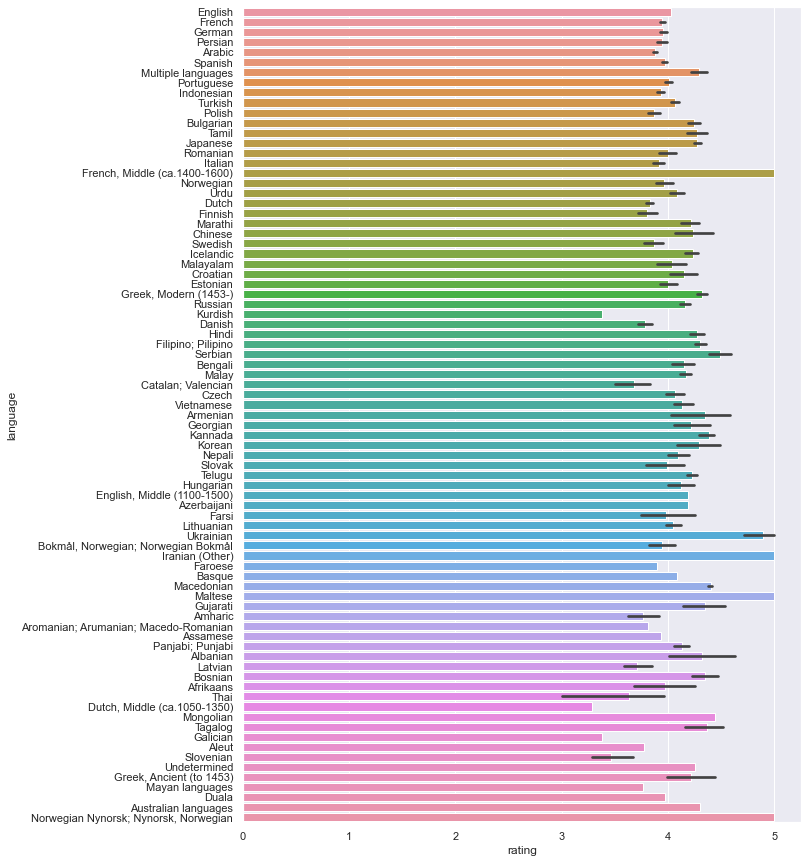

In [99]:
# Book rating by language

plt.figure(figsize=(10,15))
sns.barplot(data=df2, x='rating', y='language')